# Gradient of Image

## import library

In [2]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors

## load input image ('test.jpeg')

In [3]:
I0 = img.imread('test.jpeg')

## check the size of the input image

In [4]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
num_row     = I0.shape[0]
num_column  = I0.shape[1]
num_channel = I0.shape[2]
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I0 = ', num_row)
print('number of columns of I0 = ', num_column)
print('number of channels of I0 = ', num_channel)

number of rows of I0 =  510
number of columns of I0 =  512
number of channels of I0 =  3


## convert the color image into a grey image
- take the average of the input image with 3 channels with respect to the channels into an image with 1 channel

In [28]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

def getGrayMatrix(Image):
    newrow = []
    for row in I0:
        newcol = []
        
        for col in row:
            aver = 0
            for k in col:
                aver += k
            aver = int(aver/3)
            
            newcol.append(aver)
            
        newrow.append(newcol)
        
    return newrow
    
I = np.asarray(getGrayMatrix(I0))
        
num_row     = I.shape[0]
num_column  = I.shape[1]

print(I.shape)

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I = ', num_row)
print('number of columns of I = ', num_column)

(510, 512)
number of rows of I =  510
number of columns of I =  512


## normalize the converted image
- normalize the converted grey scale image so that its maximum value is 1 and its minimum value is 0

In [29]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

def normalize(d):
    return (d - np.min(d)) / (np.max(d) - np.min(d))

I = normalize(I)

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('maximum value of I = ', np.max(I))
print('minimum value of I = ', np.min(I))

maximum value of I =  1.0
minimum value of I =  0.0


## define a function to compute the derivative of input matrix in x(row)-direction

- forward difference : $ I[x+1, y] - I[x, y] $ 

[[0.4488189  0.41338583 0.43307087 ... 0.5511811  0.51181102 0.01181102]
 [0.44094488 0.44094488 0.4015748  ... 0.54724409 0.52362205 0.00393701]
 [0.4015748  0.4488189  0.4015748  ... 0.57874016 0.51181102 0.00787402]
 ...
 [0.42913386 0.42519685 0.45275591 ... 0.69291339 0.77559055 0.03149606]
 [0.40551181 0.44094488 0.3976378  ... 0.74409449 0.68503937 0.        ]
 [0.38976378 0.40551181 0.37795276 ... 0.70866142 0.64566929 0.00393701]]
[[-0.03543307  0.01968504  0.00787402 ... -0.03937008 -0.5
   0.        ]
 [ 0.         -0.03937008  0.01968504 ... -0.02362205 -0.51968504
   0.        ]
 [ 0.04724409 -0.04724409  0.02755906 ... -0.06692913 -0.50393701
   0.        ]
 ...
 [-0.00393701  0.02755906 -0.0984252  ...  0.08267717 -0.74409449
   0.        ]
 [ 0.03543307 -0.04330709 -0.00787402 ... -0.05905512 -0.68503937
   0.        ]
 [ 0.01574803 -0.02755906  0.00393701 ... -0.06299213 -0.64173228
   0.        ]]


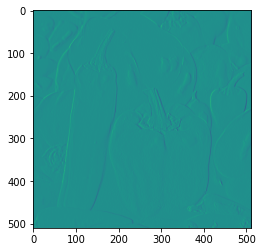

In [32]:
def compute_derivative_x_forward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    for row in range(0,len(I)):
        newrow = []
        
        for col in range(0,len(I[row])-1):
            newcol = []
            
            temparr = I[row][col]
            temparr2 = I[row][col+1]
            
                
            D[row][col] = temparr2 - temparr     
                
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- backward difference : $ I[x, y] - I[x-1, y] $ 

In [40]:
def compute_derivative_x_backward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    for row in range(0,len(I)):
        newrow = []
        
        for col in range(1,len(I[row])):
            newcol = []
            
            temparr = I[row][col-1]
            temparr2 = I[row][col]
            
                
            D[row][col] = temparr2 - temparr     
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D


- central difference : $ \frac{1}{2} \left( I[x+1, y] - I[x-1, y] \right)$ 

[[0.4488189  0.41338583 0.43307087 ... 0.5511811  0.51181102 0.01181102]
 [0.44094488 0.44094488 0.4015748  ... 0.54724409 0.52362205 0.00393701]
 [0.4015748  0.4488189  0.4015748  ... 0.57874016 0.51181102 0.00787402]
 ...
 [0.42913386 0.42519685 0.45275591 ... 0.69291339 0.77559055 0.03149606]
 [0.40551181 0.44094488 0.3976378  ... 0.74409449 0.68503937 0.        ]
 [0.38976378 0.40551181 0.37795276 ... 0.70866142 0.64566929 0.00393701]]
[[ 0.         -0.00787402  0.01377953 ... -0.01968504 -0.26968504
   0.        ]
 [ 0.         -0.01968504 -0.00984252 ... -0.02165354 -0.27165354
   0.        ]
 [ 0.          0.         -0.00984252 ... -0.02755906 -0.28543307
   0.        ]
 ...
 [ 0.          0.01181102 -0.03543307 ...  0.00787402 -0.33070866
   0.        ]
 [ 0.         -0.00393701 -0.02559055 ... -0.01771654 -0.37204724
   0.        ]
 [ 0.         -0.00590551 -0.01181102 ... -0.02165354 -0.3523622
   0.        ]]


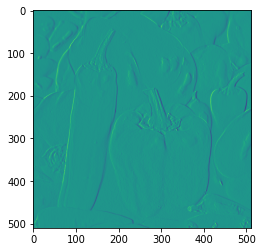

In [43]:
def compute_derivative_x_central(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    for row in range(0,len(I)):
        newrow = []
        
        for col in range(1,len(I[row])-1):
            newcol = []
            
            temparr = I[row][col+1]
            temparr2 = I[row][col-1]
            
                
            D[row][col] = (temparr - temparr2)/2
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D


## define a function to compute the derivative of input matrix in y(column)-direction

- forward difference : $ I[x, y+1] - I[x, y] $ 

In [ ]:
def compute_derivative_y_forward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- backward difference : $ I[x, y] - I[x, y-1] $ 

In [ ]:
def compute_derivative_y_backward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- central difference : $ \frac{1}{2} \left( I[x, y+1] - I[x, y-1] \right)$ 

In [ ]:
def compute_derivative_y_central(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

## compute the norm of the gradient of the input image 

- $L_2^2$-norm of the gradient $ \left( \frac{\partial I}{\partial x}, \frac{\partial I}{\partial y} \right) $ is defined by $ \left( \frac{\partial I}{\partial x} \right)^2 + \left( \frac{\partial I}{\partial y} \right)^2 $

In [ ]:
def compute_norm_gradient_central(I):
    
    norm_gradient = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return norm_gradient

___

___

## functions for presenting the results

___

___

In [ ]:
def function_result_01():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I0)
    plt.show()

In [ ]:
def function_result_02():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I, cmap='gray', vmin=0, vmax=1, interpolation='none')
    plt.show()

In [ ]:
def function_result_03():

    D = compute_derivative_x_forward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [ ]:
def function_result_04():

    D = compute_derivative_x_backward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [ ]:
def function_result_05():

    D = compute_derivative_x_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [ ]:
def function_result_06():

    D = compute_derivative_y_forward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [ ]:
def function_result_07():

    D = compute_derivative_y_backward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [ ]:
def function_result_08():

    D = compute_derivative_y_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [ ]:
def function_result_09():

    D = compute_norm_gradient_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [ ]:
def function_result_10():

    D = compute_norm_gradient_central(I)
    
    plt.figure(figsize=(8,6))
    im = plt.imshow(D, cmap=cm.jet, norm=colors.LogNorm())
    plt.colorbar(im)
    plt.show()

In [ ]:
def function_result_11():

    D = compute_derivative_x_forward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [ ]:
def function_result_12():

    D = compute_derivative_x_backward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [ ]:
def function_result_13():

    D = compute_derivative_x_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [ ]:
def function_result_14():

    D = compute_derivative_y_forward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [ ]:
def function_result_15():

    D = compute_derivative_y_backward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [ ]:
def function_result_16():

    D = compute_derivative_y_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [ ]:
def function_result_17():

    D = compute_norm_gradient_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


___

___

# results

___

___

In [ ]:
number_result = 17

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)